In [1]:
from ultralytics import YOLO
import cv2
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [ ]:
model = YOLO("yolo12n.pt") 

results = model.train(
        data="checkers.v3i.yolov12/data.yaml",   
        epochs=100,      
        imgsz=640,         
        batch=16,     
        name="checkers_yolo12", 
        patience=20,        
    )


New https://pypi.org/project/ultralytics/8.3.250 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.243 🚀 Python-3.13.11 torch-2.9.1+cu128 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 5771MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=checkers.v3i.yolov12/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=checkers

In [ ]:
model_path = "resultados/runs_3_classes/detect/checkers_yolo12/weights/best.pt"
model = YOLO(model_path)

print("Running evaluation...")
metrics = model.val(data="checkers.v3i.yolov12/data.yaml", split="test")

print("\n--- Evaluation Results ---")
print(f"mAP50 (Accuracy at 50% overlap): {metrics.box.map50:.3f}")
print(f"mAP50-95 (High precision accuracy): {metrics.box.map:.3f}")

Running evaluation...
Ultralytics 8.3.243 🚀 Python-3.13.11 torch-2.9.1+cu128 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 5771MiB)
YOLOv12n summary (fused): 159 layers, 2,557,313 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2033.4±784.6 MB/s, size: 35.4 KB)
val: Scanning /home/ricadinho/Desktop/cenas_universidade/2_ano/1_semestre/APVC/Projeto/YoloPreTrained/checkers.v3i.yolov12/test/labels.cache... 135 images, 2 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 135/135 312.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 4.4it/s 2.0s0.1ss
                   all        135       1560      0.684      0.988       0.76      0.522
                 BOARD         34         34      0.259          1      0.369      0.367
                 black        123        775       0.86      0.969       0.94      0.584
                 white        120        751      0.934      0.996       0.97    

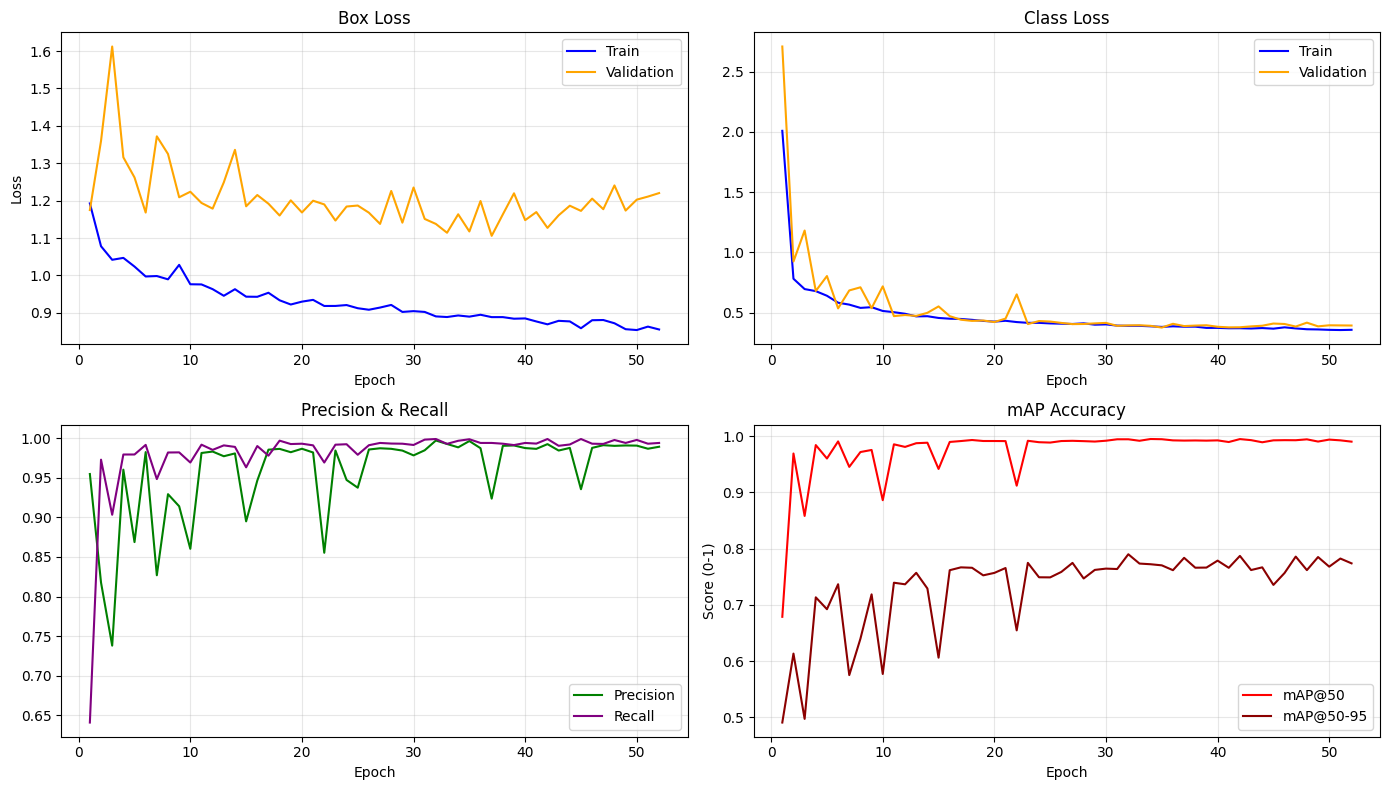

In [ ]:
data = pd.read_csv("resultados/runs_3_classes/detect/checkers_yolo12/results.csv")
data.columns = data.columns.str.strip()

# 3. Setup the window size (width, height)
plt.figure(figsize=(14, 8))
    
# --- Subplot 1: Box Loss (Localization) ---
plt.subplot(2, 2, 1)
plt.plot(data['epoch'], data['train/box_loss'], label='Train', color='blue')
plt.plot(data['epoch'], data['val/box_loss'], label='Validation', color='orange')
plt.title('Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# --- Subplot 2: Class Loss (Identification) ---
plt.subplot(2, 2, 2)
plt.plot(data['epoch'], data['train/cls_loss'], label='Train', color='blue')
plt.plot(data['epoch'], data['val/cls_loss'], label='Validation', color='orange')
plt.title('Class Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True, alpha=0.3)

# --- Subplot 3: Precision & Recall ---
plt.subplot(2, 2, 3)
plt.plot(data['epoch'], data['metrics/precision(B)'], label='Precision', color='green')
plt.plot(data['epoch'], data['metrics/recall(B)'], label='Recall', color='purple')
plt.title('Precision & Recall')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True, alpha=0.3)

# --- Subplot 4: mAP (Overall Accuracy) ---
plt.subplot(2, 2, 4)
plt.plot(data['epoch'], data['metrics/mAP50(B)'], label='mAP@50', color='red')
plt.plot(data['epoch'], data['metrics/mAP50-95(B)'], label='mAP@50-95', color='darkred')
plt.title('mAP Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Score (0-1)')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Display the plot window
plt.tight_layout()
plt.show()
